In [1]:
%matplotlib notebook
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('../data_and_visualisation/HTRU_2.csv')
data.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS',
                'Class']

In [3]:
x = data.drop('Class', axis = 'columns')
y = data['Class']

In [4]:
ssc = StandardScaler()
ssc.fit(x)
x_skal = ssc.transform(x)

In [5]:
x_skal = pd.DataFrame(x_skal)
x_skal.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS']

In [6]:
x = x_skal

In [7]:
pca = PCA()
x_pca = pca.fit_transform(x_skal)

In [8]:
x_pca = pd.DataFrame(x_pca)

In [9]:
x_pca_y = pd.DataFrame.copy(x_pca)
x_pca_y['Class'] = y

<IPython.core.display.Javascript object>


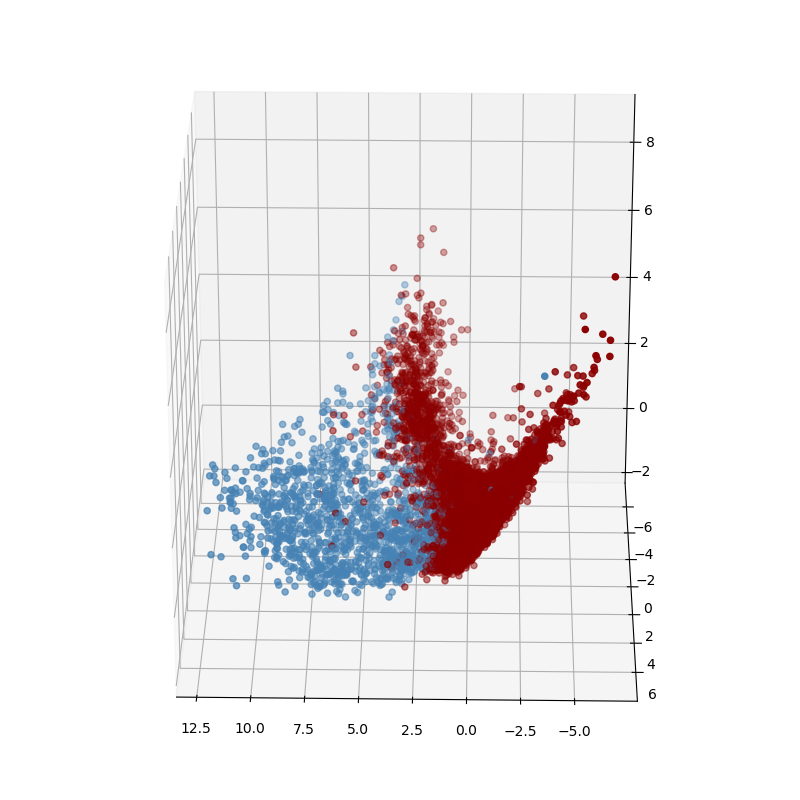

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def boja(xs):
    ret = []
    for x in xs:
        if x == 1:
            ret.append('SteelBlue')
        else:
            ret.append('DarkRed')
    return ret

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.view_init(27,91)
ax.scatter(x_pca_y[0], x_pca_y[1], x_pca_y[2], c = boja(x_pca_y['Class']))
plt.show()
#crtamo pca podataka, bojimo ih klasom (ne znamo hoce li nam klasterovanje izdvojiti te klase ili ne, ali bilo bi zanimljivo da ih nadje sam od sebe nenadgledano)

In [11]:
def klasteruj_i_prikazi(k, x, x_pca, sses = None, siluete = None):
    fig = plt.figure(figsize=(4, 4))
    ax = Axes3D(fig)
    ax.view_init(27,91)
    
    ksredina = KMeans(n_clusters=k)
    ksredina.fit(x)
    
    print("SSE: %f" % ksredina.inertia_)
    if(sses != None):
        sses.append(ksredina.inertia_)
    print("Silueta: %f" % silhouette_score(x, ksredina.labels_))
    if(siluete != None):
        siluete.append(silhouette_score(x, ksredina.labels_))

    ax.scatter(x_pca[0], x_pca[1], x_pca[2], c=ksredina.labels_)

In [12]:
sses = []
siluete = []
ssesPCA = []
siluetePCA = []
#pratimo kako napreduju siluete i kvadrati gresaka za razlicite parametre f je k_i_p()

<IPython.core.display.Javascript object>


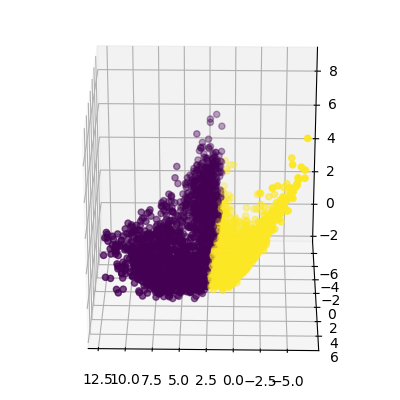

SSE: 92209.414914
Silueta: 0.601098


In [13]:
klasteruj_i_prikazi(2, x, x_pca, sses, siluete)
#klasterujemo originalne podatke i tim klasterima odredjujemo kako bojimo pca podatke

<IPython.core.display.Javascript object>


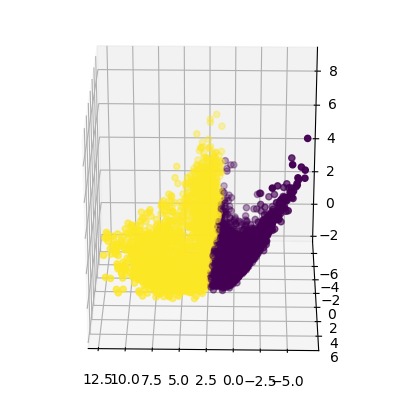

SSE: 92209.423748
Silueta: 0.601020


In [14]:
klasteruj_i_prikazi(2, x_pca, x_pca, ssesPCA, siluetePCA)
#klasterujemo i crtamo pca podatke

<IPython.core.display.Javascript object>


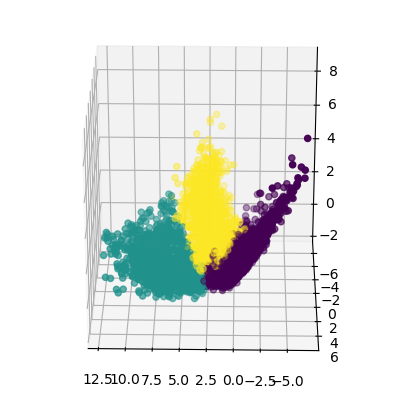

SSE: 68067.313721
Silueta: 0.517414


In [15]:
klasteruj_i_prikazi(3, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


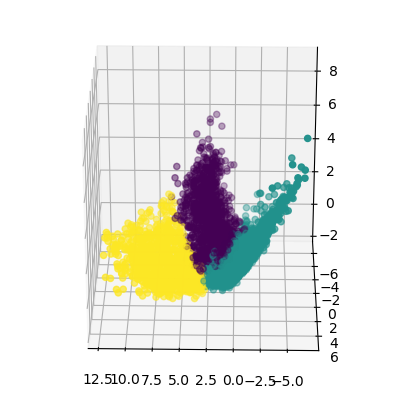

SSE: 68067.354250
Silueta: 0.517517


In [16]:
klasteruj_i_prikazi(3, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


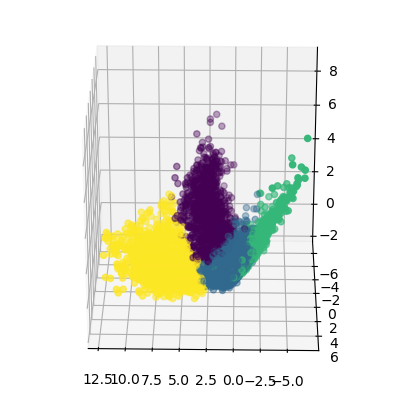

SSE: 53118.943787
Silueta: 0.353613


In [17]:
klasteruj_i_prikazi(4, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


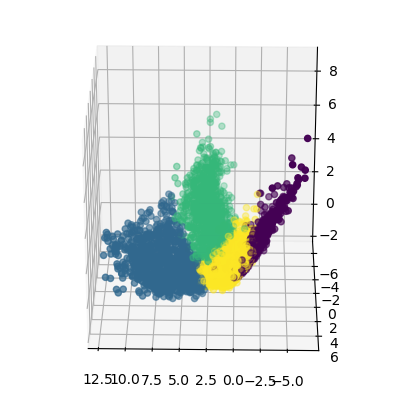

SSE: 53118.420676
Silueta: 0.354356


In [18]:
klasteruj_i_prikazi(4, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


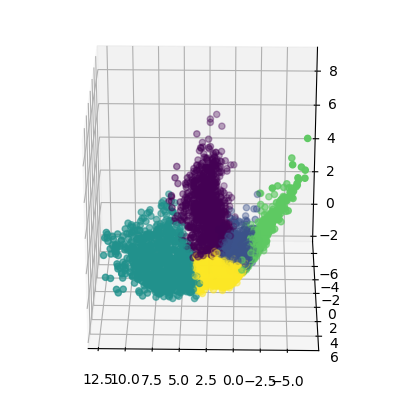

SSE: 44217.061101
Silueta: 0.303306


In [19]:
klasteruj_i_prikazi(5, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


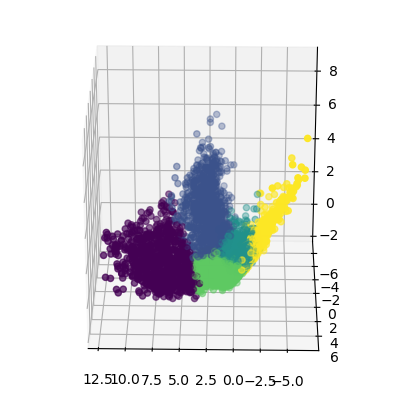

SSE: 44216.886074
Silueta: 0.303298


In [20]:
klasteruj_i_prikazi(5, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


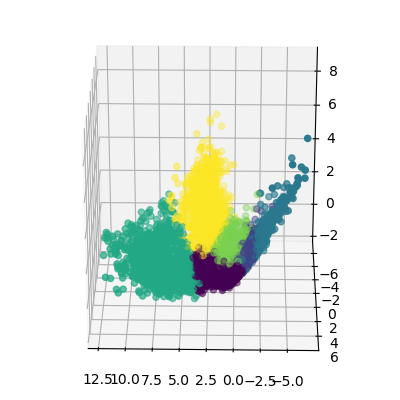

SSE: 39131.847705
Silueta: 0.267726


In [21]:
klasteruj_i_prikazi(6, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


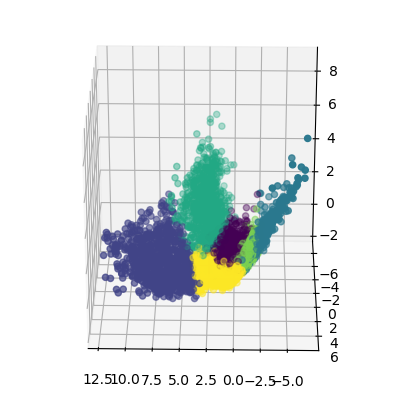

SSE: 39131.003970
Silueta: 0.268096


In [22]:
klasteruj_i_prikazi(6, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


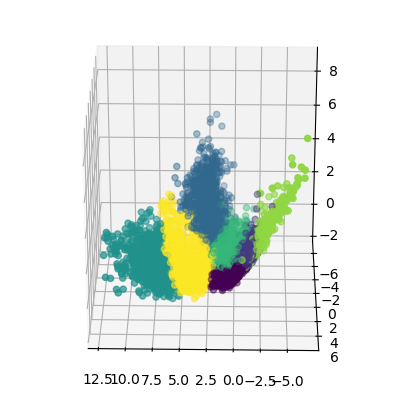

SSE: 34349.587706
Silueta: 0.273268


In [23]:
klasteruj_i_prikazi(7, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


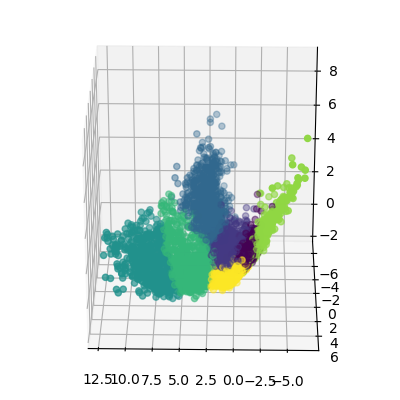

SSE: 34349.695089
Silueta: 0.273230


In [24]:
klasteruj_i_prikazi(7, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


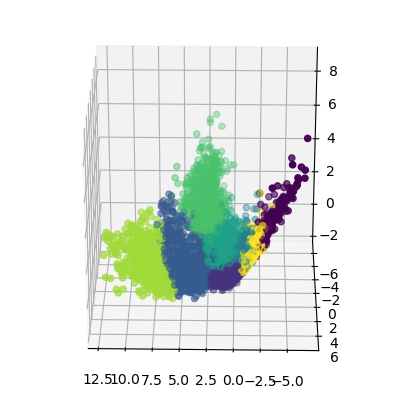

SSE: 31188.632429
Silueta: 0.278343


In [25]:
klasteruj_i_prikazi(8, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


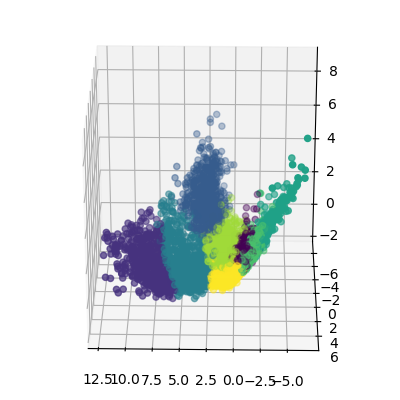

SSE: 31188.613378
Silueta: 0.278275


In [26]:
klasteruj_i_prikazi(8, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


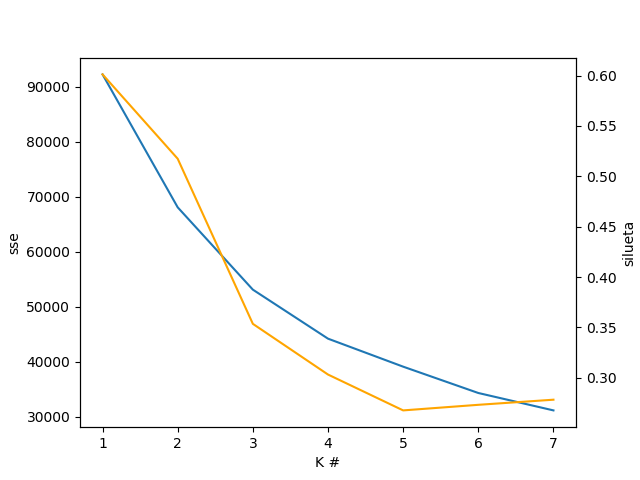

In [27]:
xs = [*range(1, 8)]

fig,ax = plt.subplots()
ax.plot(xs, sses)
ax.set_xlabel("K #")
ax.set_ylabel("sse")

ax2=ax.twinx()
ax2.plot(xs, siluete, c = 'orange')
ax2.set_ylabel("silueta")
plt.show()


<IPython.core.display.Javascript object>


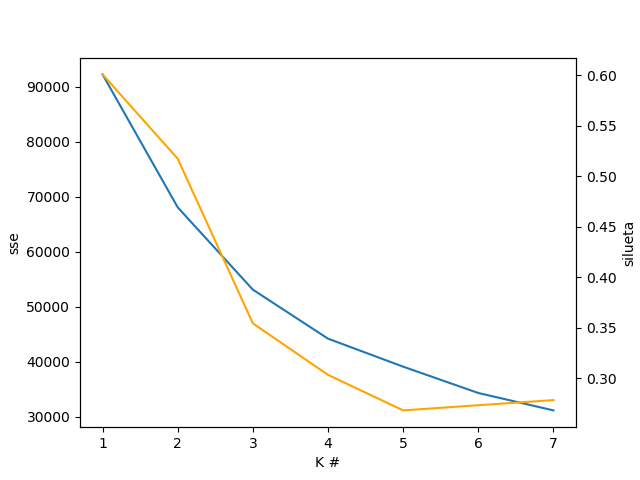

In [28]:
xs = [*range(1, 8)]

fig,ax = plt.subplots()
ax.plot(xs, ssesPCA)
ax.set_xlabel("K #")
ax.set_ylabel("sse")

ax2=ax.twinx()
ax2.plot(xs, siluetePCA, c = 'orange')
ax2.set_ylabel("silueta")
plt.show()

In [29]:
#sve je identicno za dva pristupa? je l smo to ocekivali? u nekoj meri ili bas ovolikoj?